In this project we'll be working with a Star Wars survey, 'StarWars.csv'. This project will be focused primarily on data cleaning so the data set is ready for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

star_wars = pd.read_csv('StarWars.csv', encoding = "ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
# Let's have a closer look at the first row of data
star_wars.iloc[0]

RespondentID                                                                                                                                                                              NaN
Have you seen any of the 6 films in the Star Wars franchise?                                                                                                                         Response
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                                                                Response
Which of the following Star Wars films have you seen? Please select all that apply.                                                                  Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                                                                                        Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                        

In [3]:
print(star_wars.shape)
star_wars.columns

(1187, 38)


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

From looking through the Dataframe we can see that there are several columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

First, we'll need to remove any invalid rows such as in the 'RespondentID' column which is supposed to be a unique ID for each respondent, but is blank in the first row which looks 

In [4]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]

The Dataframe now consists of rows where there are no invalid RespondentID rows. 

If we look at the next two columns after 'RespondentID', we can see that both are represented by Yes/No questions. We can make the data a bit easier to analyze in the future by converting each of these columns to a Boolean having only values True, False and NaN. We can use the .map() method along with a dictionary to replace the "Yes" string into True and the "No" string into False.

In [5]:
yes_no = {
    'Yes': True, 
    'No': False
}

for col in [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?'
]:
    star_wars[col] = star_wars[col].map(yes_no)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Columns 4 to 9 have string values with the movie the respondant saw. Similar to how we cleaned columns 2-3, we want to convert these into booleans with the .map() method. In addition, we want to change the column names to reference the true or false question.

In [6]:
true_false = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False,
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(true_false)
    
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [7]:
# Change the column names with the .rename() method to indicate which films the respondants have seen
star_wars = star_wars.rename(columns = {
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
    'Unnamed: 4':'seen_2',
    'Unnamed: 5':'seen_3',
    'Unnamed: 6':'seen_4',
    'Unnamed: 7':'seen_5',
    'Unnamed: 8':'seen_6',
})

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do yo

We've successfully cleaned up columns 1-9. Columns 10 to 16 are movie ranking values. We can change the column names using the .rename() method. In addition, these columns ask the respondents to rank the Star Wars movies in order from least favourite(6) to most favourite(1) so we can convert these columns into the float type.

In [8]:
# Change columns to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
    'Unnamed: 10':'ranking_2',
    'Unnamed: 11':'ranking_3',
    'Unnamed: 12':'ranking_4',
    'Unnamed: 13':'ranking_5',
    'Unnamed: 14':'ranking_6',
})

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?æ',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
 

Let's now do some basic analysis and see which of the 6 Star Wars movies are the best rated.

In [9]:
mean = star_wars[star_wars.columns[9:15]].mean()
mean

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

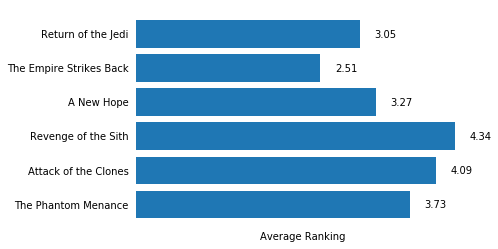

In [10]:
fig, ax = plt.subplots()

plt.barh(range(1,7), mean)
plt.xlabel('Average Ranking')

ax.set_yticks(range(1,7))
ax.set_yticklabels([
    'The Phantom Menance', 
    'Attack of the Clones', 
    'Revenge of the Sith', 
    'A New Hope', 
    'The Empire Strikes Back', 
    'Return of the Jedi'
])

# Hide Tick Marks and Spines of plot to improve Data-Ink Ratio
ax.tick_params(bottom = False, top = False, left = False, right = False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(labelbottom = False)

mean_label = mean.values.round(2)
# Add labels beside bars representing ratings
for i, v in enumerate(mean_label):
    ax.text(v + 0.2, i + 0.9, str(v))

plt.show()

The Star Wars movies for columns 10 to 16 were ranked from least favourite(6) to most favourite(1) so columns with lower ranking values are considered to be better by the respondents. From the chart, we can see that the older movies, Episodes 4 - 6, have higher rankings than the newer movies, Episodes 1 - 3.

We've cleaned columns 4 to 9 and converted them into the Boolean type. We can use pandas.DataFrame.sum() or mean() for analysis of these columns as they treat Booleans like integers(True = 1, False = 0). Now we can determine the amount of people that have seen each movie by taking the sum of the columns.

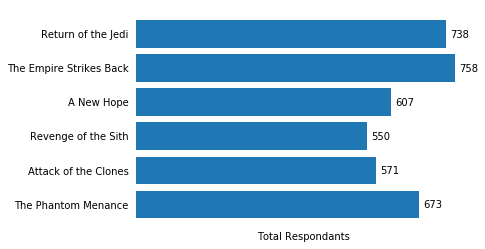

In [11]:
sums = star_wars[star_wars.columns[3:9]].sum()

fig, ax = plt.subplots()

plt.barh(range(1,7), sums)
plt.xlabel('Total Respondants')

ax.set_yticks(range(1,7))
ax.set_yticklabels([
    'The Phantom Menance', 
    'Attack of the Clones', 
    'Revenge of the Sith', 
    'A New Hope', 
    'The Empire Strikes Back', 
    'Return of the Jedi'
])

ax.tick_params(bottom = False, top = False, left = False, right = False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(labelbottom = False)

sum_label = sums.values

for i, v in enumerate(sum_label):
    ax.text(v + 10, i + 0.9, str(v))

plt.show()

From the chart, we can see that in general more respondents watched the original movies, Episodes 4-6. We can see that a high number of respondants saw Episode 1, this may be due to the time span between the release of Episode 6 and Episode 1 (19 years), which may have led to a high level of anticipation.

We can do some further analysis by seeing if these results change much do to the sex of the respondents.

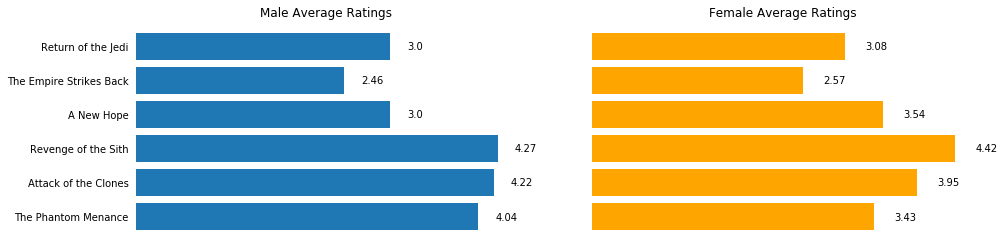

In [12]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']


mean_males = males[star_wars.columns[9:15]].mean()

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.barh(range(1,7), mean_males)

ax1.set_yticks(range(1,7))
ax1.set_yticklabels([
    'The Phantom Menance', 
    'Attack of the Clones', 
    'Revenge of the Sith', 
    'A New Hope', 
    'The Empire Strikes Back', 
    'Return of the Jedi'
])

ax1.tick_params(bottom = False, top = False, left = False, right = False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelbottom = False)
ax1.set_title('Male Average Ratings')

mean_males_label = mean_males.values.round(2)

for i, v in enumerate(mean_males_label):
    ax1.text(v + 0.2, i + 0.9, str(v))
    
    
mean_females = females[star_wars.columns[9:15]].mean()

plt.barh(range(1,7), mean_females, color = 'orange')

ax2.tick_params(bottom = False, top = False, left = False, right = False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelbottom = False, labelleft = False)
ax2.set_title('Female Average Ratings')

mean_females_label = mean_females.values.round(2)

for i, v in enumerate(mean_females_label):
    ax2.text(v + 0.25, i + 0.9, str(v))

plt.show()

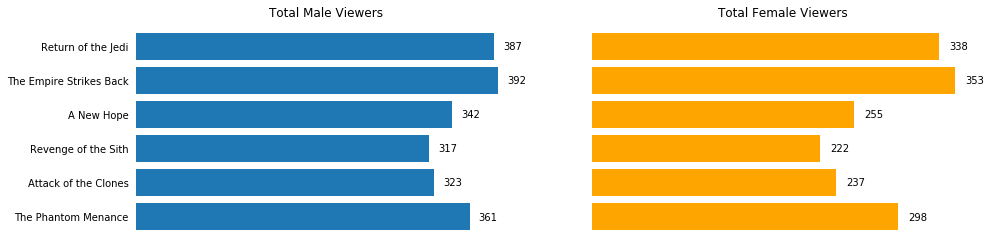

In [13]:
sum_males = males[star_wars.columns[3:9]].sum()

fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.barh(range(1,7), sum_males)

ax1.set_yticks(range(1,7))
ax1.set_yticklabels([
    'The Phantom Menance', 
    'Attack of the Clones', 
    'Revenge of the Sith', 
    'A New Hope', 
    'The Empire Strikes Back', 
    'Return of the Jedi'
])

ax1.tick_params(bottom = False, top = False, left = False, right = False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(labelbottom = False)
ax1.set_title('Total Male Viewers')

sum_males_label = sum_males.values

for i, v in enumerate(sum_males_label):
    ax1.text(v + 10, i + 0.9, str(v))
    
    
sum_females = females[star_wars.columns[3:9]].sum()

plt.barh(range(1,7), sum_females, color = 'orange')

ax2.tick_params(bottom = False, top = False, left = False, right = False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(labelbottom = False, labelleft = False)
ax2.set_title('Total Female Viewers')

sum_females_label = sum_females.values

for i, v in enumerate(sum_females_label):
    ax2.text(v + 10, i + 0.9, str(v))

plt.show()

From the charts above we can see that more males saw the prequel movies(1-3). Both groups also rated the original movies higher than the prequel movies.

There are still some columns that we need to clean up. The columns from 15 to 29 contains data on the Star Wars characters that the respondents view favourably and unfavourably. We'll clean these columns up and determine which character the respondents liked the most and which they disliked.

In [14]:
# Rename the columns representative of the Star Wars characters
star_wars = star_wars.rename(columns = {
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Hans Solo',
    'Unnamed: 16':'Luke Skywalker',
    'Unnamed: 17':'Princess Leia Organa',
    'Unnamed: 18':'Anakin Skywalker',
    'Unnamed: 19':'Obi Wan Kenobi',
    'Unnamed: 20':'Emperor Palpatine',
    'Unnamed: 21':'Darth Vadar',
    'Unnamed: 22':'Lando Calrissian',
    'Unnamed: 23':'Boba Fett',
    'Unnamed: 24':'C-3PO',
    'Unnamed: 25':'R2 D2',
    'Unnamed: 26':'Jar Jar Binks',
    'Unnamed: 27':'Padme Amidala',
    'Unnamed: 28':'Yoda',
})

In [15]:
character = [
    'Hans Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi', 
    'Emperor Palpatine', 'Darth Vadar', 'Lando Calrissian', 'Boba Fett', 'C-3PO', 'R2 D2', 'Jar Jar Binks',
    'Padme Amidala', 'Yoda'
            ]

famous_characters = {}

for name in character:
    column = star_wars[name].value_counts(normalize = True)
    famous_characters[name] = column

In [16]:
star_wars_characters = pd.DataFrame(famous_characters).sort_index()
star_wars_characters

,Hans Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vadar,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Neither favorably nor unfavorably (neutral),0.053076,0.045728,0.057762,0.164034,0.052121,0.261671,0.101695,0.287805,0.305419,0.095526,0.068675,0.199756,0.254300,0.061743
Somewhat favorably,0.182147,0.263538,0.252708,0.326853,0.192727,0.175676,0.207022,0.271951,0.188424,0.276904,0.222892,0.158343,0.224816,0.174334
Somewhat unfavorably,0.009650,0.015644,0.014440,0.100851,0.009697,0.083538,0.123487,0.076829,0.118227,0.027811,0.012048,0.124239,0.071253,0.009685
Unfamiliar (N/A),0.018094,0.007220,0.009627,0.063183,0.020606,0.191646,0.012107,0.180488,0.162562,0.018138,0.012048,0.132765,0.201474,0.012107
Very favorably,0.735826,0.664260,0.658243,0.297691,0.716364,0.135135,0.375303,0.173171,0.169951,0.573156,0.677108,0.136419,0.206388,0.732446
Very unfavorably,0.001206,0.003610,0.007220,0.047388,0.008485,0.152334,0.180387,0.009756,0.055419,0.008464,0.007229,0.248477,0.041769,0.009685


In [17]:
star_wars_characters = star_wars_characters.rename(index = {
    'Somewhat favorably':'Favourable',
    'Very favorably':'Favourable',
    'Somewhat unfavorably':'Unfavourable',
    'Very unfavorably':'Unfavourable',
})

star_wars_characters = star_wars_characters.groupby(star_wars_characters.index, sort=False).sum()
star_wars_characters

,Hans Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vadar,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Neither favorably nor unfavorably (neutral),0.053076,0.045728,0.057762,0.164034,0.052121,0.261671,0.101695,0.287805,0.305419,0.095526,0.068675,0.199756,0.254300,0.061743
Favourable,0.917973,0.927798,0.910951,0.624544,0.909091,0.310811,0.582324,0.445122,0.358374,0.850060,0.900000,0.294762,0.431204,0.906780
Unfavourable,0.010856,0.019254,0.021661,0.148238,0.018182,0.235872,0.303874,0.086585,0.173645,0.036276,0.019277,0.372716,0.113022,0.019370
Unfamiliar (N/A),0.018094,0.007220,0.009627,0.063183,0.020606,0.191646,0.012107,0.180488,0.162562,0.018138,0.012048,0.132765,0.201474,0.012107


In [18]:
# Percentage of favourability of each character
star_wars_characters = star_wars_characters.multiply(100, axis = 1).apply(np.around, decimals = 1)
star_wars_characters

,Hans Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vadar,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
Neither favorably nor unfavorably (neutral),5.3,4.6,5.8,16.4,5.2,26.2,10.2,28.8,30.5,9.6,6.9,20.0,25.4,6.2
Favourable,91.8,92.8,91.1,62.5,90.9,31.1,58.2,44.5,35.8,85.0,90.0,29.5,43.1,90.7
Unfavourable,1.1,1.9,2.2,14.8,1.8,23.6,30.4,8.7,17.4,3.6,1.9,37.3,11.3,1.9
Unfamiliar (N/A),1.8,0.7,1.0,6.3,2.1,19.2,1.2,18.0,16.3,1.8,1.2,13.3,20.1,1.2


From the data we can see that the main protagonists of the original films are rated very highly with Luke Skywalker the most favoured, quickly followed by Hans Solo and Princess Leia Organa respectively. When it comes to unfavourable characters, Jar Jar Binks is the most unfavoured even more so than Emperor Palpatine and Darth Vadar who were the main antagonists in the majority of these 6 films.